### A. Librerias

In [14]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

### B. Leer tablas

In [24]:
# 1. Leer los datos
df_publicaciones_renacyt = pd.read_parquet('processed/resumen_parquet/a_publicaciones_renacyt.parquet')
df_publicaciones_renacyt.head(3)

,ctiVitae,orcid,institucionLaboralActual,nombreCompleto,fuenteExtraccionData,descTipoProduccionBibliografica,titulo,revista,quartil,fechaProduccion,añoProduccion,urlRenacyt,urlOrcid,urlPublicacion
0,10,0000-0003-1583-7113,UNIVERSIDAD DE LIMA,SILVIA PATRICIA PONCE ALVAREZ,Renacyt,Conference Paper,Development and evaluation of an autonomous an...,Proceedings of SPIE - The International Societ...,Sin quartil,2023-01-01,2023,https://ctivitae.concytec.gob.pe/buscador-ui/#...,https://orcid.org/0000-0003-1583-7113,www.doi.org/10.1117/12.2647950
1,10,0000-0003-1583-7113,UNIVERSIDAD DE LIMA,SILVIA PATRICIA PONCE ALVAREZ,Renacyt,Art\xedculo en revista cient\xedfica,The Applicability of Cellulose \u2014 Tara Gum...,"Water, Air, and Soil Pollution",Q2,2022-08-01,2022,https://ctivitae.concytec.gob.pe/buscador-ui/#...,https://orcid.org/0000-0003-1583-7113,www.doi.org/10.1007/S11270-022-05818-Z
2,10,0000-0003-1583-7113,UNIVERSIDAD DE LIMA,SILVIA PATRICIA PONCE ALVAREZ,Renacyt,Art\xedculo en revista cient\xedfica,Cellulose Microfibres Obtained from Agro-Indus...,"Water, Air, and Soil Pollution",Q2,2020-10-01,2020,https://ctivitae.concytec.gob.pe/buscador-ui/#...,https://orcid.org/0000-0003-1583-7113,www.doi.org/10.1007/S11270-020-04889-0


### C. Gráficos por universidad

In [48]:
# Top 9 Todos los años
instituciones = [
    'UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS',
    'UNIVERSIDAD PERUANA CAYETANO HEREDIA',
    'UNIVERSIDAD CIENTIFICA DEL SUR S.A.C.',
    'UNIVERSIDAD SAN IGNACIO DE LOYOLA S.A',
    'PONTIFICIA UNIVERSIDAD CATOLICA DEL PERU',
    'UNIVERSIDAD NACIONAL AGRARIA LA MOLINA',
    'UNIVERSIDAD CESAR VALLEJO S.A.C.',
    'UNIVERSIDAD NACIONAL DE TRUJILLO',
    'UNIVERSIDAD NACIONAL DE INGENIERIA UNI'
]

In [49]:
# Top 9 Desde el 2015

instituciones = [
    'UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS',
    'UNIVERSIDAD SAN IGNACIO DE LOYOLA S.A',
    'UNIVERSIDAD CIENTIFICA DEL SUR S.A.C.',
    'UNIVERSIDAD PERUANA CAYETANO HEREDIA',
    'PONTIFICIA UNIVERSIDAD CATOLICA DEL PERU',
    'UNIVERSIDAD NACIONAL AGRARIA LA MOLINA',
    'UNIVERSIDAD CESAR VALLEJO S.A.C.',
    'UNIVERSIDAD NACIONAL DE TRUJILLO',
    'UNIVERSIDAD PRIVADA DEL NORTE SAC'
]

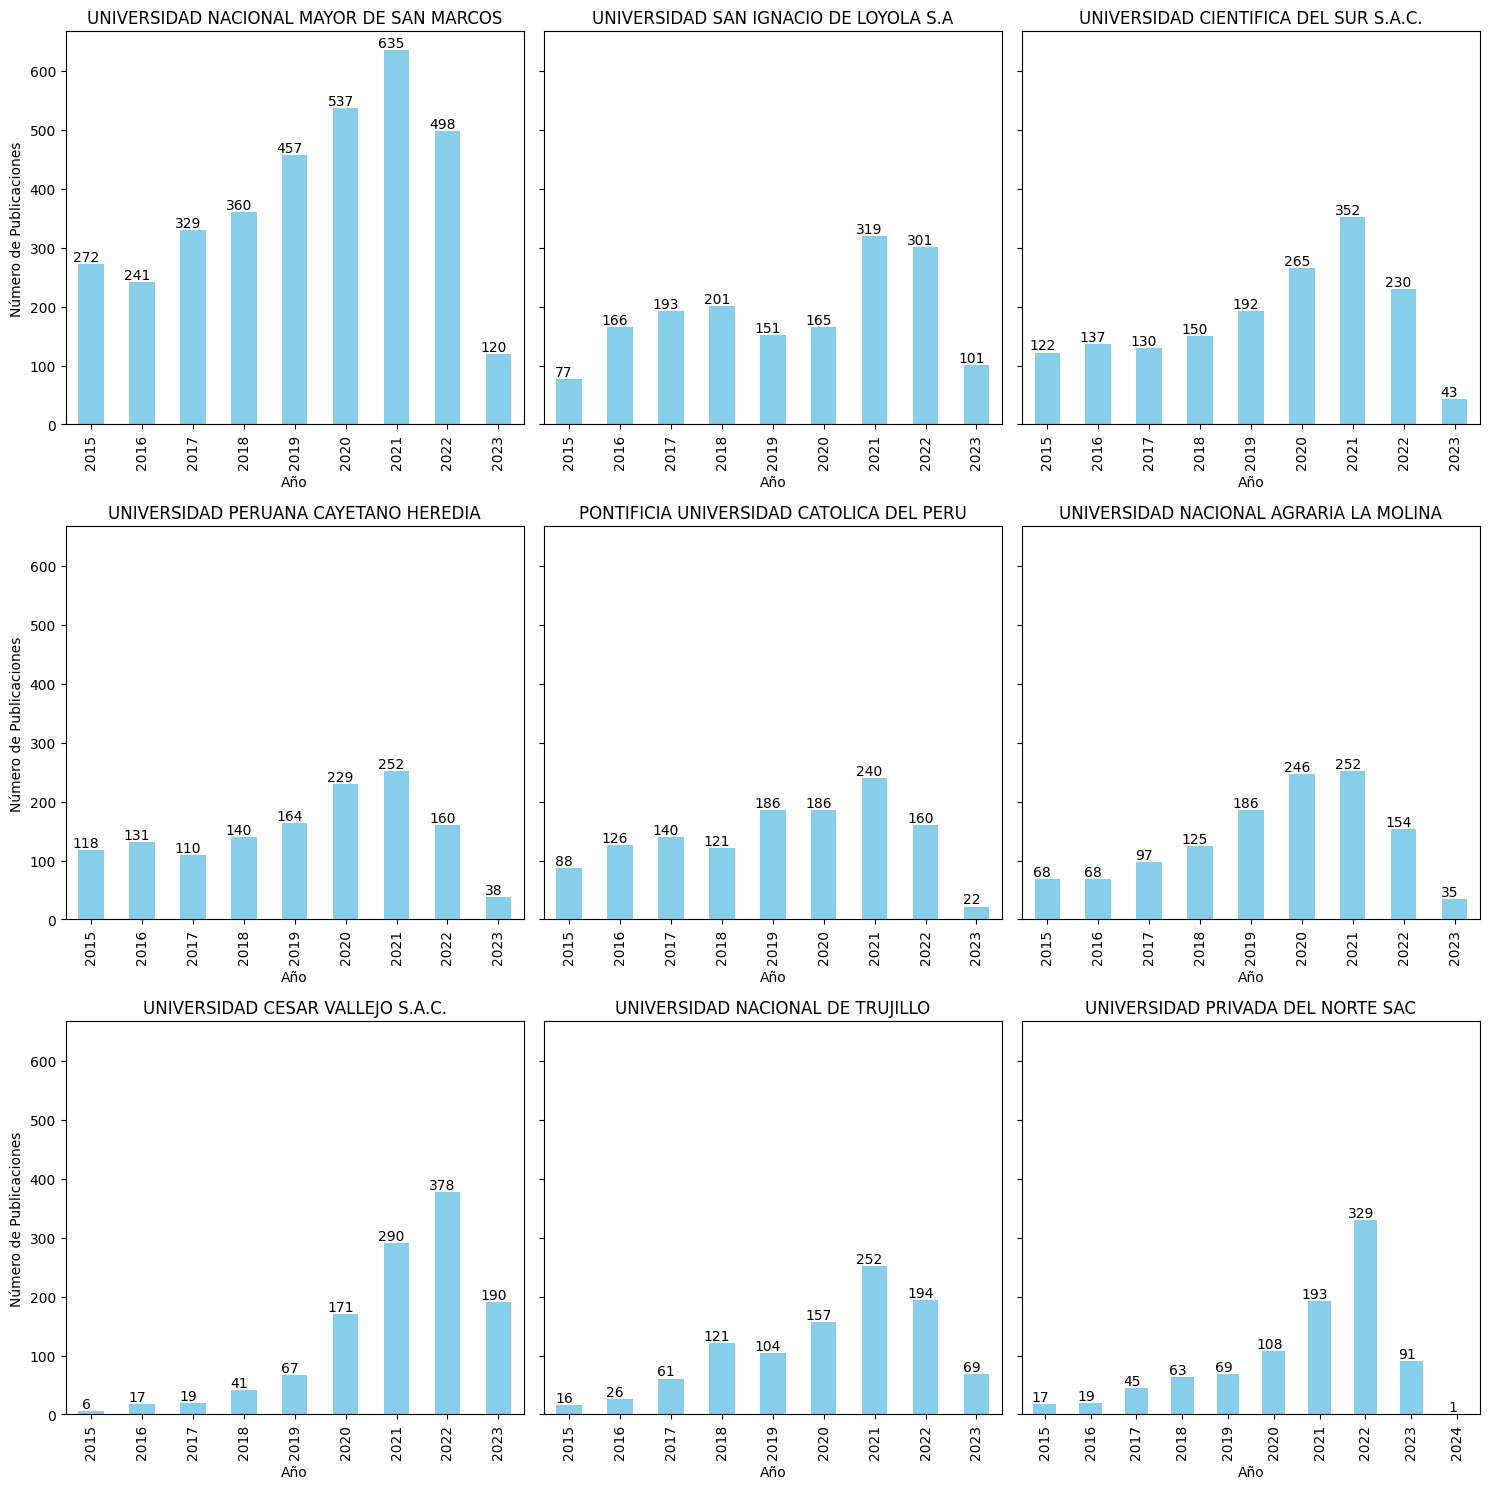

In [50]:
# Crear un gráfico de subplots 3x3 con el mismo eje y
fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharey=True)

# Función para plotear el número de publicaciones por año
def plot_publicaciones_por_anio(df, institucion, ax):
    df_anio = df[df['añoProduccion'] >= 2015].groupby('añoProduccion').size()
    bars = df_anio.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'{institucion}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Número de Publicaciones')

    # Mostrar el número de publicaciones dentro de cada barra
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', va='bottom')

# Plotear cada institución en su respectivo subplot
for i, institucion in enumerate(instituciones):
    row = i // 3
    col = i % 3
    df_institucion = df_publicaciones_renacyt[df_publicaciones_renacyt['institucionLaboralActual'] == institucion]
    plot_publicaciones_por_anio(df_institucion, institucion, axs[row, col])

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

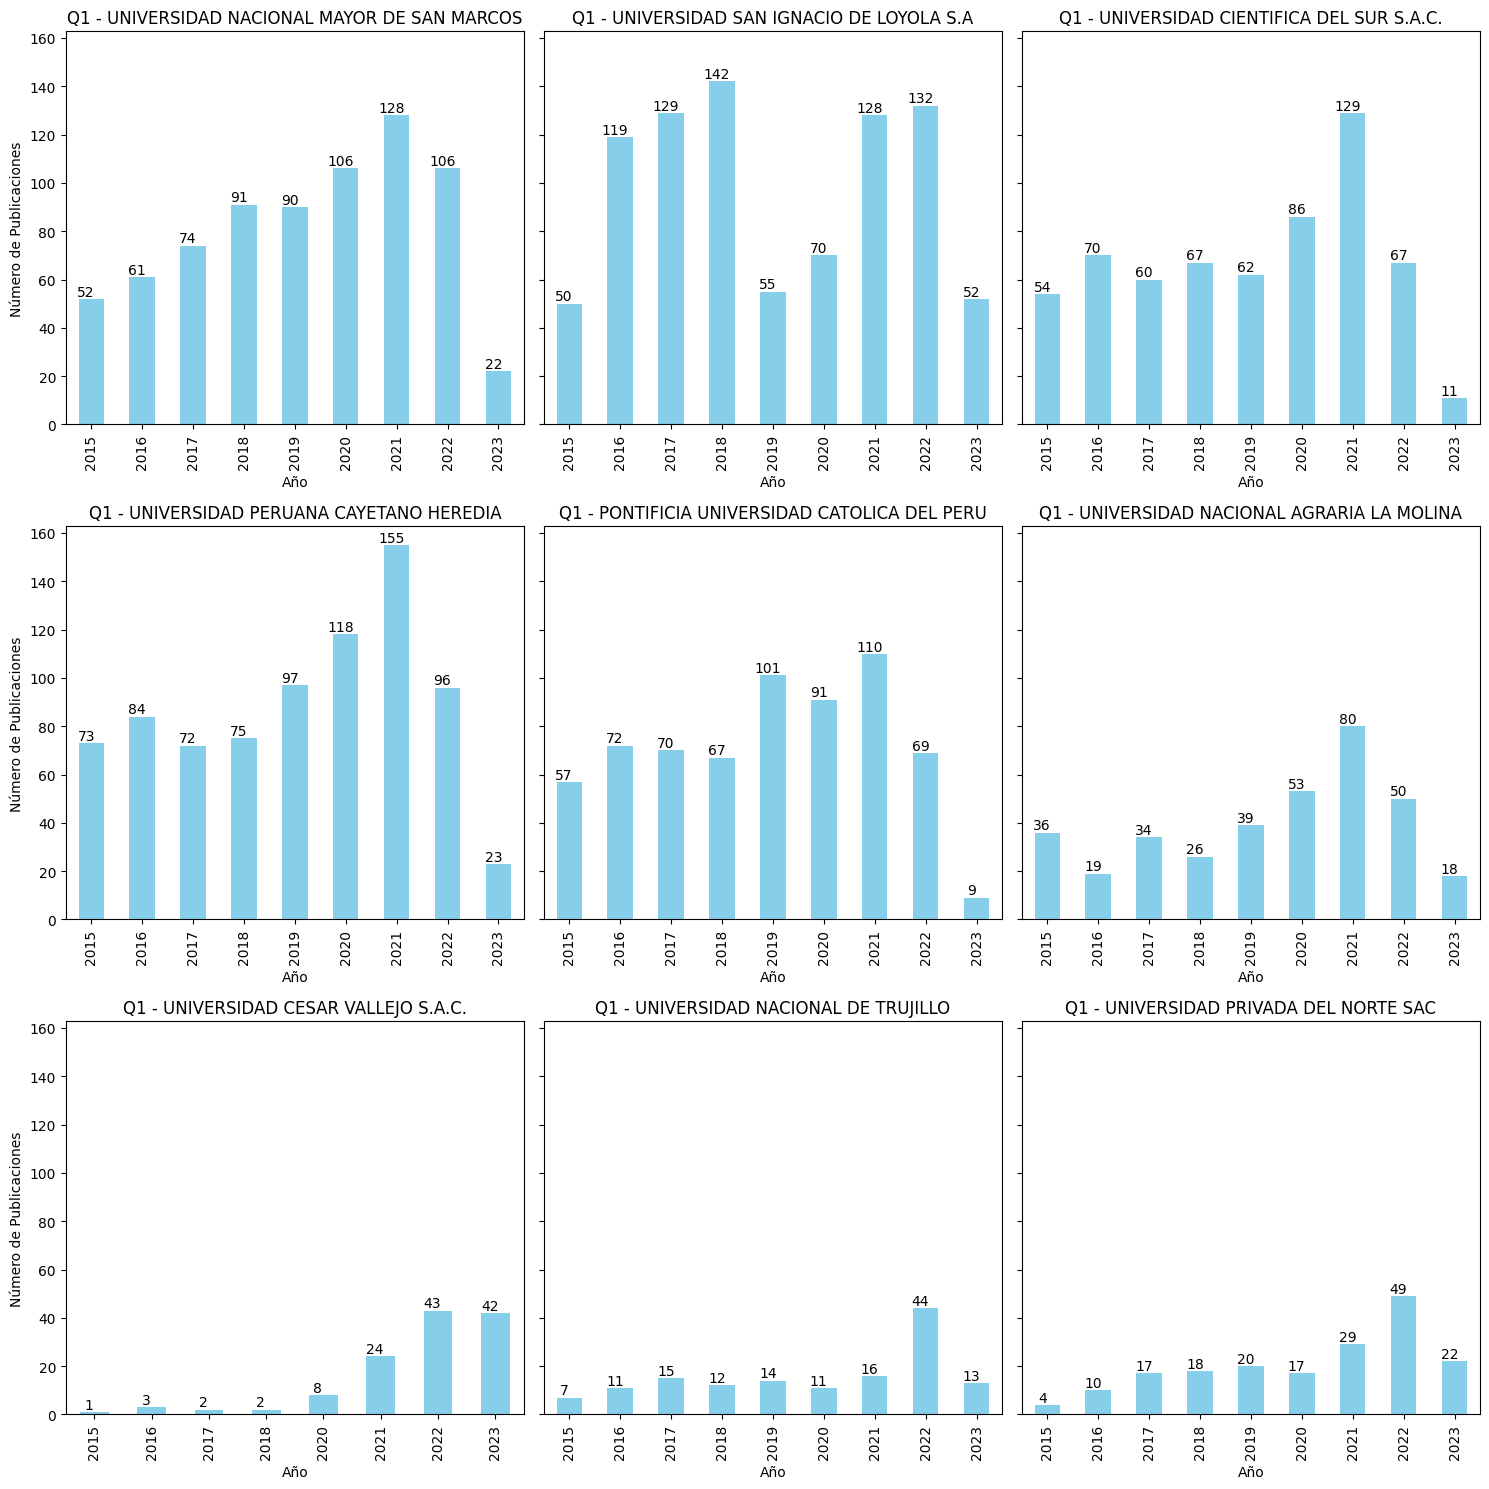

In [51]:

# Crear un gráfico de subplots 3x3 con el mismo eje y
fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharey=True)

# Función para plotear el número de publicaciones por año
def plot_publicaciones_por_anio(df, institucion, ax, quartil):
    df_anio = df[(df['añoProduccion'] >= 2015) & (df['quartil'] == quartil)].groupby('añoProduccion').size()
    bars = df_anio.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'{quartil} - {institucion}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Número de Publicaciones')

    # Mostrar el número de publicaciones dentro de cada barra
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', va='bottom')

# Plotear cada institución en su respectivo subplot
for i, institucion in enumerate(instituciones):
    row = i // 3
    col = i % 3
    df_institucion = df_publicaciones_renacyt[df_publicaciones_renacyt['institucionLaboralActual'] == institucion]
    plot_publicaciones_por_anio(df_institucion, institucion, axs[row, col], quartil='Q1')  # Puedes cambiar 'Q1' por 'Q2', 'Q3', o 'Q4'

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


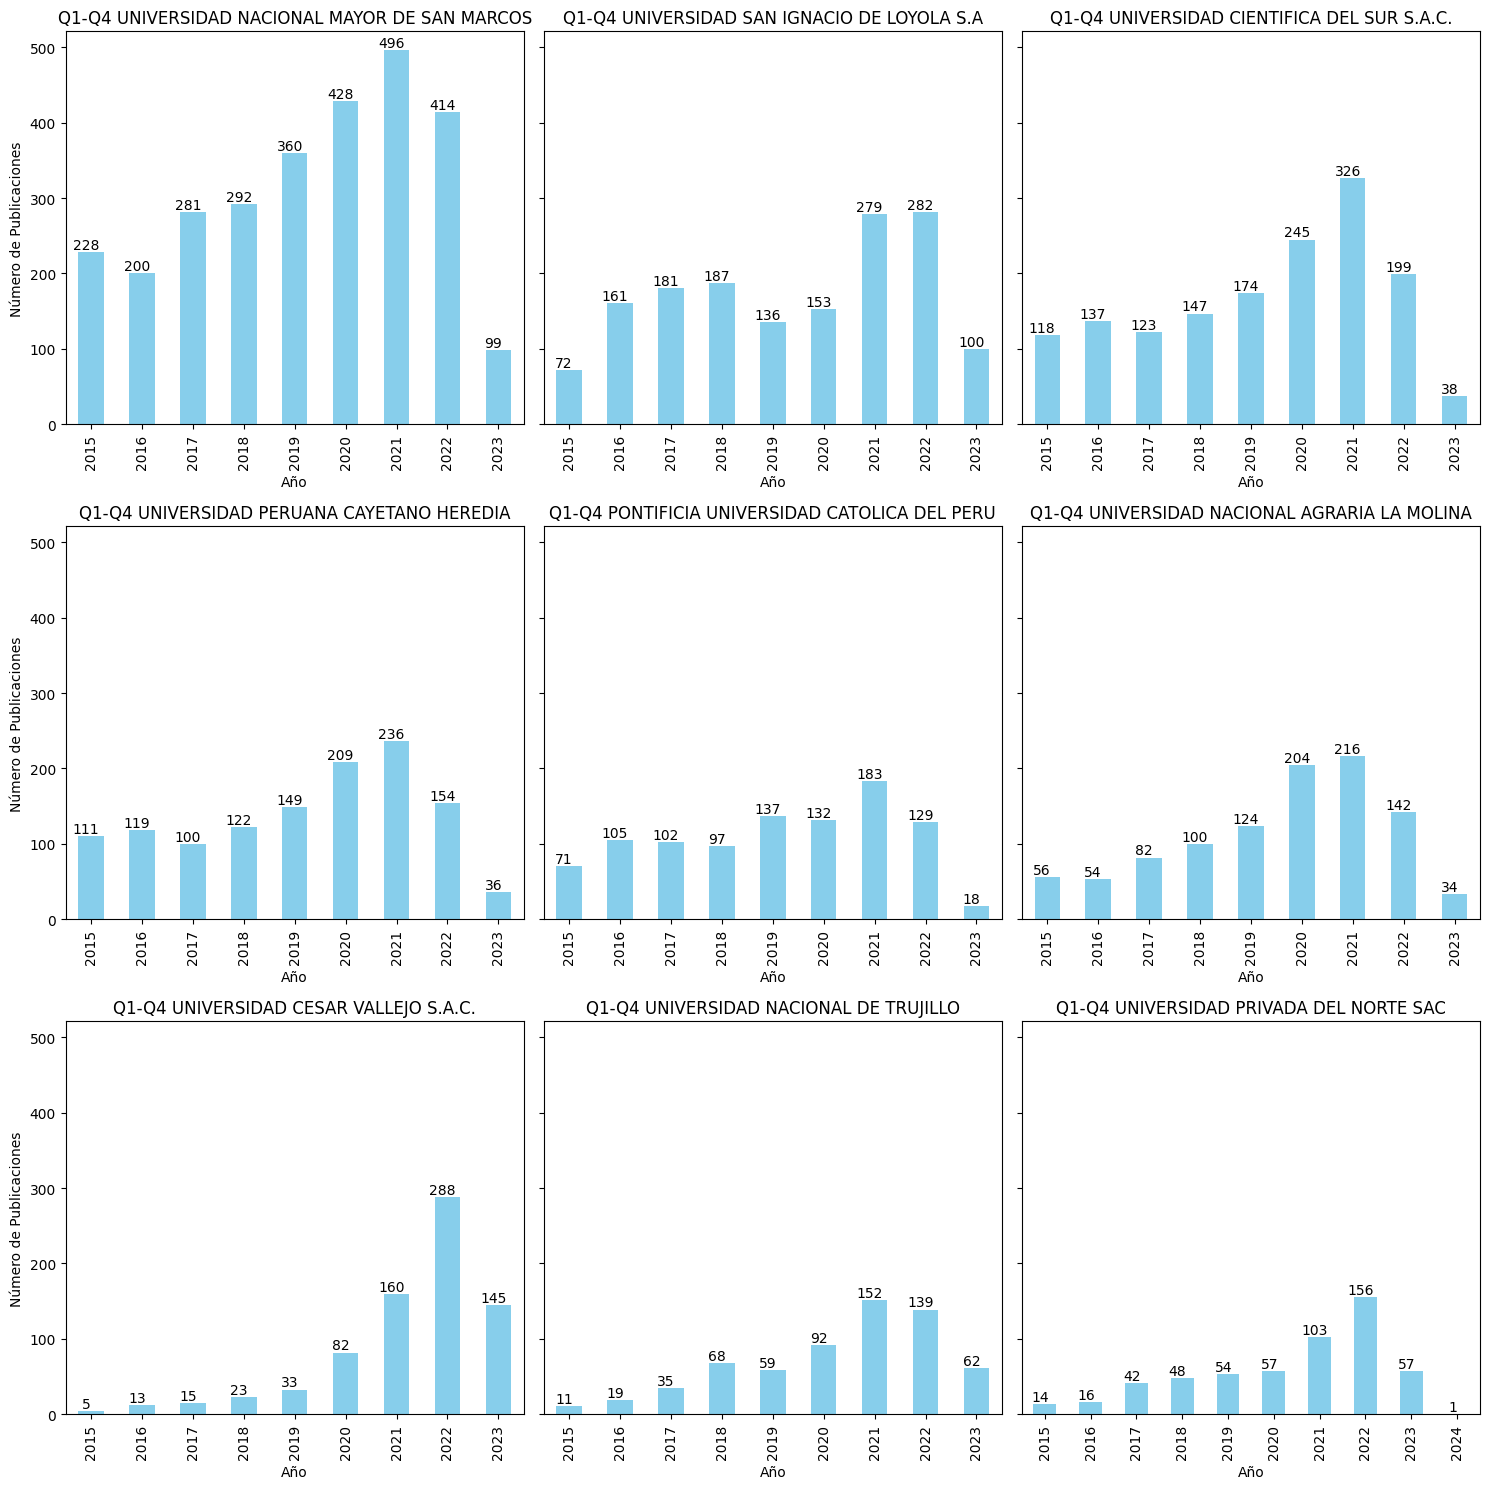

In [52]:
# Crear un gráfico de subplots 3x3 con el mismo eje y
fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharey=True)

# Función para plotear el número de publicaciones por año
def plot_publicaciones_por_anio(df, institucion, ax, quartil):
    df_anio = df[(df['añoProduccion'] >= 2015) & (df['quartil'] != quartil)].groupby('añoProduccion').size()
    bars = df_anio.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Q1-Q4 {institucion}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Número de Publicaciones')

    # Mostrar el número de publicaciones dentro de cada barra
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', va='bottom')

# Plotear cada institución en su respectivo subplot
for i, institucion in enumerate(instituciones):
    row = i // 3
    col = i % 3
    df_institucion = df_publicaciones_renacyt[df_publicaciones_renacyt['institucionLaboralActual'] == institucion]
    plot_publicaciones_por_anio(df_institucion, institucion, axs[row, col], quartil='Sin quartil')  # Puedes cambiar 'Q1' por 'Q2', 'Q3', o 'Q4'

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


### D. Gráficos por persona

In [55]:
# Dame el top 9 de las universidades con más publicaciones desde el 2015
df_aux = df_publicaciones_renacyt[df_publicaciones_renacyt['añoProduccion'] >= 2015]
df_aux.groupby('nombreCompleto').size().sort_values(ascending=False).head(9)

nombreCompleto
DAVID ROMERO ABAD                           350
LUIS JUNIOR SANCHEZ ROSAS                   317
ALBERTO MARTIN GAGO MEDINA                  303
CHRISTIAN RICHARD MEJIA ALVAREZ             203
JOSE LUIS BAZO ALBA                         194
ANTONIO BERNABE ORTIZ                       166
RUB\xc9N AR\xcdSTIDES GONZ\xc1LEZ CRESPO    158
HUBER AMANCIO NIETO CHAUPIS                 157
AVID ROMAN GONZALEZ                         124
dtype: int64